In [82]:
import pandas as pd
import tweepy
import requests
import os
import json
import time
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline

## Gather data

Read in provided data to a dataframe.

In [83]:
ea = pd.read_csv('twitter-archive-enhanced.csv') # Read in enhanced twitter archive

Now use the requests library to programmatically download the `image-predictions.tsv` file from 

In [84]:
r = requests.get(
    'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

Write image predictions data in to a `.tsv` file.

In [85]:
with open('image-predictions.tsv', 'w', encoding='utf-8') as file: 
    file.write(str(r.text))

Read `.tsv` file in to dataframe `ip`.

In [86]:
ip = pd.read_csv('image-predictions.tsv', sep = '\t')

In [87]:
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [88]:
ea.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None


Grab all the tweet ids.

In [89]:
ids = ea['tweet_id']

Cycle through all the tweet ids, and grab their JSON data from the Twitter API using `tweepy` and `json`.

Many tweets have been deleted, and so cause an error to be thrown.

In [90]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

Grab all the JSON data from tweepy and store it in `tweet_json.txt`. If an error is thrown when we try to access a tweet this probably means the tweet was deleted. The `try` `except` block allows us to continue on despite errors.

with open('tweet_json.txt', mode = 'w', encoding='utf-8') as file:
    for x in ids:
        try:
            tweet = api.get_status(x, tweet_mode='extended')
            json.dump(tweet._json, file)
            print(x)
        except:
            print('This tweet ID: {0}, raised an error.'.format(x))

The JSON data is not parseable by the `json` decoder. [This stackoverflow answer](https://stackoverflow.com/questions/21708192/how-do-i-use-the-json-module-to-read-in-one-json-object-at-a-time/21709058#21709058) proved very useful parsing the following JSON data in `tweet_json.txt`. 

In [91]:
from functools import partial

def json_parse(fileobj, decoder=json.JSONDecoder(), buffersize=2048):
    buffer = ''
    for chunk in iter(partial(fileobj.read, buffersize), ''):
        buffer += chunk
        while buffer:
            try:
                result, index = decoder.raw_decode(buffer)
                yield result
                buffer = buffer[index:]
            except ValueError:
                break

Build a list of dictionaries using `json_parse()` to read the JSON objects individually, then create a new dataframe with our new information from the Twitter api.

In [92]:
df_list = []

with open('tweet_json.txt', mode='r', encoding='utf-8') as file:
    for data in json_parse(file):
        df_list.append({'rt_count': data['retweet_count'],
                        'fav_count': data['favorite_count'],
                        'tweet_id': data['id']})

In [93]:
cols = ['rt_count', 'fav_count', 'tweet_id']

from_api = pd.DataFrame(df_list,
                        columns = cols)

## Assessment

In [94]:
df_clean = ea.copy()

In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [96]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None


In [97]:
df_clean.text.str.extract(pat='(\d+)/10')

,0
0,13
1,13
2,12
3,13
4,12
5,13
6,13
7,13
8,13
9,14


In [98]:
ip.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [99]:
ip.img_num.describe()

count    2075.000000
mean        1.203855
std         0.561875
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: img_num, dtype: float64

In [100]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [101]:
df_clean[df_clean.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [102]:
ip[ip.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [103]:
ip['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [104]:
ip['p2_conf'].describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [105]:
ip['p3_conf'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [106]:
df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


## Quality issues

### Quality issues with the tweets dataframe

* Datatype issues:
 1. `tweet_id` should be a string not an int.
 2. `timestamp` should be a datetime object
* The `source` column has html tags still around it.
* All data that's a retweet should be dropped.
* All data that's a reply should be dropped.
* The `in_reply_to...` columns should be dropped. They're almost entirely `NaN`s. The same can be said for the `retweeted_status...` columns.
* Not all tweets have an image in them
* Some rating numerators and denominators are wrong when another fraction appears in the tweet.

### Quality issues with the image predictions dataframe:
* `tweet_id` should be a string not an int
* `p1`, `p2`, and `p3` columns have '\_' instead of spaces. There's also inconsistency in their capitalization.

### Api data issues
* `rt_count` and `fav_count` should be ints rather than floats.

## Tidiness issues

* The api dataframe and the enhanced tweets dataframe both have data on the same set of tweets, meaning each type of observational unit does *not* form a table.
* `doggo`, `floofer`, `pupper`, and `puppo` are not variables, but data. These shouldn't be in the columns.

## Cleaning

### Define

#### *__`tweet_id` should be a string__*.

We'll fix this by using `.astype()`.

### Clean

In [107]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

### Test

Verify that the data type is a string:

In [108]:
df_clean['tweet_id'].dtype

dtype('O')

---------
### Define

#### *__`timestamp`__* should be a datetime object.

We'll fix this by using `pd.to_datetime`.

### Clean

In [109]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

### Test

Verify that the column is `datetime` type. This should show up as `<M8[ns]`.

In [110]:
df_clean['timestamp'].dtype

dtype('<M8[ns]')

---------------------
### Define


#### The `source` column still has html tags around it.

We grab everything inside the tag.

### Clean

In [111]:
# We'll use regex to solve this problem
import re

In [112]:
# Let's us see all the contents of 'source'
pd.set_option('max_colwidth', 100)

Test and confirm our regex pattern works:

In [113]:
df_clean.source.head(100)

0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
5     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
6     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
7     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
8     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
9     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
10    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
11    <a href="http:/

In [114]:
pattern = re.compile(r'<a.*>([\w\s]+)</a>')

Test our pattern to see if it gets what want:

In [115]:
match = pattern.search('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>')

In [116]:
match.groups()

('Twitter for iPhone',)

In [117]:
df_clean.source = df_clean.source.str.extract(pat = pattern)

### Test

Test to see if we've successfully gotten rid of the html tags:

In [118]:
df_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

---------------------- 
### Define


#### Data from retweets should be removed.

Rows with non-null values in  `Retweeted_status...` columns should be dropped, as these are retweets.

### Clean

In [119]:
df_clean[['retweeted_status_id', 'retweeted_status_user_id',
         'retweeted_status_timestamp']].notnull().sum()

retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
dtype: int64

All three columns share the same rows with non-null values, so we'll drop the rows where `retweeted_status_id` is not null (it doesn't matter which column we choose).

In [120]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

Now let's check the `in_reply_to...` columns to see if they have meet the same criteria as `retweeted_status...` columns:

In [121]:
df_clean[df_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extrem...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36,Twitter for iPhone,@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25,Twitter for iPhone,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35,Twitter for iPhone,"@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy c...",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53,Twitter for iPhone,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never chang...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51,Twitter for iPhone,@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52,Twitter for iPhone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN H...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03,Twitter for iPhone,@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enorm...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


A visual inspection of these data shows they aren't retweets. However, they represent a very small part of the dataset -- I'm going to drop rows where these columns aren't null in the interest of consistency.

After dropping these rows, our dataset will be purely tweets. No retweets, and no replies.

In [122]:
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]

### Test

There should be zero non-null entries fo `in_reply_to_status_id`.

In [123]:
df_clean['in_reply_to_status_id'].notnull().sum()

0

--------
### Define

#### __The `in_reply_to...` and `retweet_status...` columns should be dropped.

We'll verify that these columns are all NaN's and then drop them.

### Clean

In [124]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2006 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [125]:
to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id',
           'retweeted_status_id', 'retweeted_status_user_id',
           'retweeted_status_timestamp']

df_clean = df_clean.drop(to_drop, axis=1)

### Test

Check the columns to ensure we've dropped them.

In [126]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

--------
### Define

#### __ Not all tweets have an image in them.__
Use pandas `.str.extract` with a regular expression to extract all tweets whose urls have the word "photo" in them.

### Clean

In [127]:
df_clean = df_clean.loc[df_clean['expanded_urls'].str.extract(pat=r'(photo)', expand=False).notnull(), :]

### Test

In [128]:
df_clean.loc[df_clean['expanded_urls'].str.extract(pat=r'(photo)', expand=False).isnull(), :]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


This indexing of the dataframe returns an empty dataframe because we got rid of all tweets without an image.
*****
### Define

#### __Some rating numerators and denominators are wrong when another fraction appears in the tweet__ 

Find the correct rating fraction (we'll assume all ratings are out of 10), and put replace the `rating_numerator` and 
`rating_denominator` columns with their correct values.

### Clean

First grab the numerator from any fraction with a denominator of 10 that appears in the tweet and set the `rating_numerator` column to it.

In [203]:
df_clean.rating_numerator = df_clean.text.str.extract(pat='((?:\d+\.)?\d+)\/10')

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


11 columns are null. This will cause issues if we try to convert back to an int. We'll drop these nulls, then go ahead with our conversion back to int.

In [205]:
df_clean = df_clean.dropna()

In [207]:
df_clean.loc[:, 'rating_numerator'] = df_clean['rating_numerator'].astype(float)

Now we need to convert the denominator column to a string so we can use `.str.replace` to populate it with all 10s.

In [208]:
df_clean.rating_denominator = df_clean.rating_denominator.astype(str)

In [209]:
df_clean.rating_denominator = df_clean.rating_denominator.str.replace('(\d*)', '10')

Cast type as int as it was before.

In [210]:
df_clean.rating_denominator = df_clean.rating_denominator.astype(int)

### Test

We should have the same number of numerators and denominators.

In [199]:
df_clean[['rating_numerator', 'rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      1888 non-null float64
rating_denominator    1888 non-null int64
dtypes: float64(1), int64(1)
memory usage: 124.2 KB


No more inconsistent ratings!

Reset the index of the dataframe and assign `ea` to our cleaned dataframe:

In [722]:
df_clean.reset_index(inplace=True)

In [723]:
ea = df_clean.copy()

-------------


## Image predictions dataframe cleaning

First make a copy of image predictions dataframe.

In [724]:
ip_clean = ip.copy()

-----
### Define


#### __`tweet_id`__  should be a string not an int.

Cast the `tweet_id` column as a string.

### Clean

In [725]:
ip_clean.tweet_id = ip_clean.tweet_id.astype(str)

### Test

Check datatype to ensure `tweet_id` is now a string:

In [726]:
ip_clean.tweet_id.dtype

dtype('O')

-------------
### Define

#### __`p1`, `p2`, and `p3` columns have '\_' instead of spaces. There's also inconsistency in their capitalization.__

According to [this](https://style.mla.org/capitalizing-names-of-dog-breeds/) capitalization guide, most dog names only have the first word capitalized. We will follow this convention.

### Clean

In [727]:
ip_clean['p1'].str.replace('_', ' ').str.capitalize()

0            Welsh springer spaniel
1                           Redbone
2                   German shepherd
3               Rhodesian ridgeback
4                Miniature pinscher
5              Bernese mountain dog
6                        Box turtle
7                              Chow
8                     Shopping cart
9                  Miniature poodle
10                 Golden retriever
11                    Gordon setter
12                     Walker hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English setter
17                              Hen
18                 Desktop computer
19                Italian greyhound
20                      Maltese dog
21                 Three-toed sloth
22                               Ox
23                 Golden retriever
24                         Malamute
25                       Guinea pig
26      Soft-coated wheaten terrier
27                        Ch

In [728]:
to_fix = ['p1', 'p2', 'p3']

for col in to_fix:
    ip_clean[col] = ip_clean[col].str.replace('_', ' ').str.capitalize()

### Test

Let's check to see the desired changes have been made:

In [729]:
ip_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,Collie,Shetland sheepdog
1,Redbone,Miniature pinscher,Rhodesian ridgeback
2,German shepherd,Malinois,Bloodhound
3,Rhodesian ridgeback,Redbone,Miniature pinscher
4,Miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater swiss mountain dog
6,Box turtle,Mud turtle,Terrapin
7,Chow,Tibetan mastiff,Fur coat
8,Shopping cart,Shopping basket,Golden retriever
9,Miniature poodle,Komondor,Soft-coated wheaten terrier


Assign `ip` to the cleaned version of the dataframe.

In [730]:
ip = ip_clean.copy()

-----
## API data cleaning

First make a copy of the dataframe to do cleaning on.

In [731]:
api_clean = from_api.copy()

### Define

#### __`tweet_id` should be a string.

Cast `tweet_id` as a string.

### Clean

In [732]:
api_clean['tweet_id'] = api_clean['tweet_id'].astype(str)

### Test

Check datatypes to see if `tweet_id` has changed.

In [733]:
from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
rt_count     2343 non-null int64
fav_count    2343 non-null int64
tweet_id     2343 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


Assign `from_api` to our cleaned copy.

In [734]:
from_api = api_clean.copy()

--------

# Tidiness cleaning

### Define

#### __All three of our separate dataframes have data on the same set of tweets. For tidiness sake they should all be in the same table__.

Merge the enhanced archive that was provided, the newly obtained data from the Twitter api, and the the enhanced predictions to create our new dataframe with all the info we want.

I used [this stack overflow answer](https://stackoverflow.com/questions/23668427/pandas-joining-multiple-dataframes-on-columns) to help me merge multiple dataframes.

In [735]:
from functools import reduce

dfs = [ea, ip, from_api]

In [736]:
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), dfs)

A quick visual assessment shows we need to drop the 'index' column which is left over from our merge.

In [737]:
df = df.drop(columns=['index'])

Now make sure those columns are gone:

In [738]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'rt_count',
       'fav_count'],
      dtype='object')

Create a smaller dataframe with only rows where 'doggo', 'floofer', 'puppo', and 'pupper' columns have some value that isn't "None".

In [739]:
df_small = df.loc[(df['doggo'] != 'None') | (df['floofer'] != 'None') | (df['pupper'] != 'None') | (df['puppo'] != 'None')]

Melt this dataframe and remove rows with 'None' as our new variable's value. This makes sure our tweet ids are unique. 

In [740]:
df_small = pd.melt(df_small, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 
       'p3_dog', 'rt_count', 'fav_count'],
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
        value_name = 'dog_value')

In [741]:
df_small = df_small[df_small['dog_value'] != 'None']

Now drop the extra column "variable" created by melt.

In [742]:
df_small = df_small.drop(columns='variable')

### Test

In [743]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 979
Data columns (total 22 columns):
tweet_id              293 non-null object
timestamp             293 non-null datetime64[ns]
source                293 non-null object
text                  293 non-null object
expanded_urls         293 non-null object
rating_numerator      293 non-null int32
rating_denominator    293 non-null int32
name                  293 non-null object
jpg_url               293 non-null object
img_num               293 non-null int64
p1                    293 non-null object
p1_conf               293 non-null float64
p1_dog                293 non-null bool
p2                    293 non-null object
p2_conf               293 non-null float64
p2_dog                293 non-null bool
p3                    293 non-null object
p3_conf               293 non-null float64
p3_dog                293 non-null bool
rt_count              293 non-null int64
fav_count             293 non-null int64
dog_value    

Now we will deal with the part of the dataframe we didn't use. Let's call it df_big.

In [744]:
df_big = df.loc[(df['doggo'] == 'None') & (df['floofer'] == 'None') & (df['pupper'] == 'None') & (df['puppo'] == 'None')]

This dataframe has no data for doggo, floofer, pupper, or puppo columns. This means that our melted dataframe will have 'None' for all rows of our melted column.

In [745]:
df_big['dog_value'] = df_big['doggo'] # Set dog value to none

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Remove the four descriptive columns, doggo, floofer, pupper, and puppo.

In [746]:
df_big = df_big.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [747]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 0 to 1886
Data columns (total 22 columns):
tweet_id              1603 non-null object
timestamp             1603 non-null datetime64[ns]
source                1603 non-null object
text                  1603 non-null object
expanded_urls         1603 non-null object
rating_numerator      1603 non-null int32
rating_denominator    1603 non-null int32
name                  1603 non-null object
jpg_url               1603 non-null object
img_num               1603 non-null int64
p1                    1603 non-null object
p1_conf               1603 non-null float64
p1_dog                1603 non-null bool
p2                    1603 non-null object
p2_conf               1603 non-null float64
p2_dog                1603 non-null bool
p3                    1603 non-null object
p3_conf               1603 non-null float64
p3_dog                1603 non-null bool
rt_count              1603 non-null int64
fav_count             1603 non-n

Concatenate df_big and df_small and we have our melted, tidy dataframe!

In [748]:
df_final = pd.concat([df_big, df_small])

### Test

In [749]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 979
Data columns (total 22 columns):
tweet_id              1896 non-null object
timestamp             1896 non-null datetime64[ns]
source                1896 non-null object
text                  1896 non-null object
expanded_urls         1896 non-null object
rating_numerator      1896 non-null int32
rating_denominator    1896 non-null int32
name                  1896 non-null object
jpg_url               1896 non-null object
img_num               1896 non-null int64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null bool
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null bool
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null bool
rt_count              1896 non-null int64
fav_count             1896 non-nu

All our columns have the same number of rows, and our data is clean enough for our purposes! We just need to store our data now.

In [750]:
df_final.to_csv('twitter_archive_master.csv')

# Analysis

This analysis is being done on the cleaned version of our data. 

I assessed the data after I gathered it and determined that it wasn't clean enough to do analysis on in its raw state. In particular, concatenating all our data in to one dataframe was very convenient in our analysis. It's much easier to compute the correlation matrix when all the data is in one place.

In [751]:
df_final.corr(method='pearson')

,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,rt_count,fav_count
rating_numerator,1.000000,NaN,0.000162,-0.009173,-0.030637,-0.014075,-0.035404,-0.005200,-0.031670,0.028999,0.023921
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,0.000162,NaN,1.000000,0.199615,0.030220,-0.157819,0.056065,-0.136318,0.057834,0.165927,0.166826
p1_conf,-0.009173,NaN,0.199615,1.000000,0.119770,-0.522750,0.135612,-0.714248,0.105562,0.103817,0.110697
p1_dog,-0.030637,NaN,0.030220,0.119770,1.000000,0.109868,0.636152,0.051895,0.555095,0.017234,0.061958
p2_conf,-0.014075,NaN,-0.157819,-0.522750,0.109868,1.000000,0.096318,0.483975,0.065385,-0.055550,-0.043044
p2_dog,-0.035404,NaN,0.056065,0.135612,0.636152,0.096318,1.000000,0.029334,0.555622,0.038666,0.076794
p3_conf,-0.005200,NaN,-0.136318,-0.714248,0.051895,0.483975,0.029334,1.000000,0.038536,-0.094447,-0.084187
p3_dog,-0.031670,NaN,0.057834,0.105562,0.555095,0.065385,0.555622,0.038536,1.000000,0.002562,0.038563
rt_count,0.028999,NaN,0.165927,0.103817,0.017234,-0.055550,0.038666,-0.094447,0.002562,1.000000,0.930404


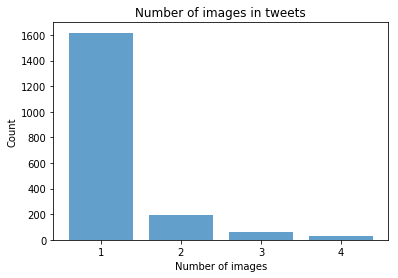

In [752]:
h = df_final.img_num.value_counts()

plt.bar(x = [1, 2, 3, 4], height = h, alpha = 0.7)
plt.xticks([1, 2, 3, 4])
plt.title('Number of images in tweets')
plt.xlabel('Number of images')
plt.ylabel('Count');

The vast majority of tweets feature only one image.

Let's investigate the relationship between image count and number of retweets.

In [753]:
x = df_final.img_num
y = df_final.rt_count

data = [y[x == i] for i in range(1, 5)]

C:\Users\Luke\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


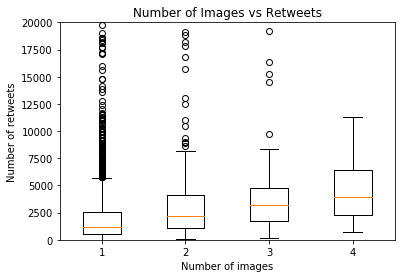

In [754]:
plt.boxplot(data)
plt.ylim(0, 20000)
plt.xlabel('Number of images')
plt.ylabel('Number of retweets')
plt.title('Number of Images vs Retweets');

There appears to be a weak positive correlation between image number and retweet number. We don't have much data on tweets with a higher number of images though. Let's take a look at the Pearson Correlation Coefficient.

In [755]:
st.pearsonr(df_final.rt_count, df_final.img_num)

(0.16592653817608144, 3.577846420300412e-13)

We find that $R = 0.166$ and $p < .001$. This suggests a statistically significant weak correlation between the two variables.

Another interesting phenomenon in our data is how the machine learning model's first, second, and third predictions interact with each other.

Let's look at the correlation matrix for the three prediction columns.

In [756]:
df_predict = df_final[['p1_conf', 'p2_conf', 'p3_conf']]

df_predict.corr()

,p1_conf,p2_conf,p3_conf
p1_conf,1.000000,-0.522750,-0.714248
p2_conf,-0.522750,1.000000,0.483975
p3_conf,-0.714248,0.483975,1.000000


Let's visualize these relationships.

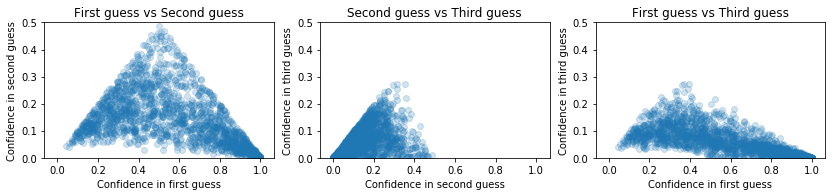

In [757]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(14, 10))

ax1.scatter(p1, p2, alpha=0.2)
ax1.set_aspect(4/3)
ax1.set_title('First guess vs Second guess')
ax1.set_xlabel('Confidence in first guess')
ax1.set_ylabel('Confidence in second guess')
ax1.set_ylim([0, 0.5])

ax2.scatter(p2, p3, alpha=0.2)
ax2.set_aspect(4/3)
ax2.set_title('Second guess vs Third guess')
ax2.set_xlabel('Confidence in second guess')
ax2.set_ylabel('Confidence in third guess')
ax2.set_ylim([0, 0.5])

ax3.scatter(p1, p3, alpha=0.2)
ax3.set_aspect(4/3)
ax3.set_title('First guess vs Third guess')
ax3.set_xlabel('Confidence in first guess')
ax3.set_ylabel('Confidence in third guess')
ax3.set_ylim([0, 0.5]);

These plots aren't what I expected to find after looking at the correlation matrix. This is a good example of why it's important to plot your data! 

The left-most plot in particular is striking -- this relationship could be modeled very closely with two different linear models. The model's confidence in the second guess peaks at 0.5, when the confidence in the first guess is also 0.5. This makes sense, as one would expect the first and second guess' probability to sum to about 1. It's important to note that this relationship is skewed to the right. This means the prediction model is more confident in its first guess than its second guess in general.

The second plot is skewed heavily towards the left -- it's much more confident in its second guess than its third guess.

The third plot is skewed to the right -- the prediction model is much more confident in its first guess than its third guess. 